In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import numpy as np

C:\Users\juann\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# About the dataset

Formula 1, the pinnacle of motorsport, is not just about speed and glamour. It's a complex interplay of regulations, technology, and human skill. This dataset offers a fascinating glimpse into how regulations have shaped the sport over the years. Let's dive in and see what insights we can uncover. If you find this notebook useful, please consider upvoting it.
https://www.kaggle.com/code/devraai/analyzing-f1-regulations-and-racing-performance

In [3]:
file_path = pathlib.Path(r'C:\Users\juann\Notebook\Formula 1\Formula 1.csv')

In [4]:
formula_1 = pd.read_csv(file_path)

In [5]:
formula_1.head(5)

,Season,Number of Teams,Number of Drivers,Number of Races,Number of New Regulations,New Regulations Impacting Aerodynamics,Fatalities,Average Car Weight (kg),DRS,Overtakes
0,1990,14,39,16,1,0,0,505,False,544
1,1991,12,26,16,1,0,0,505,False,518
2,1992,12,26,16,1,0,0,505,False,426
3,1993,12,26,16,1,0,0,505,False,434
4,1994,12,26,16,2,1,3,505,False,287


In [7]:
# Data wrangling
formula_1['DRS'] = formula_1['DRS'].replace({True: 'Yes', False: 'No'})

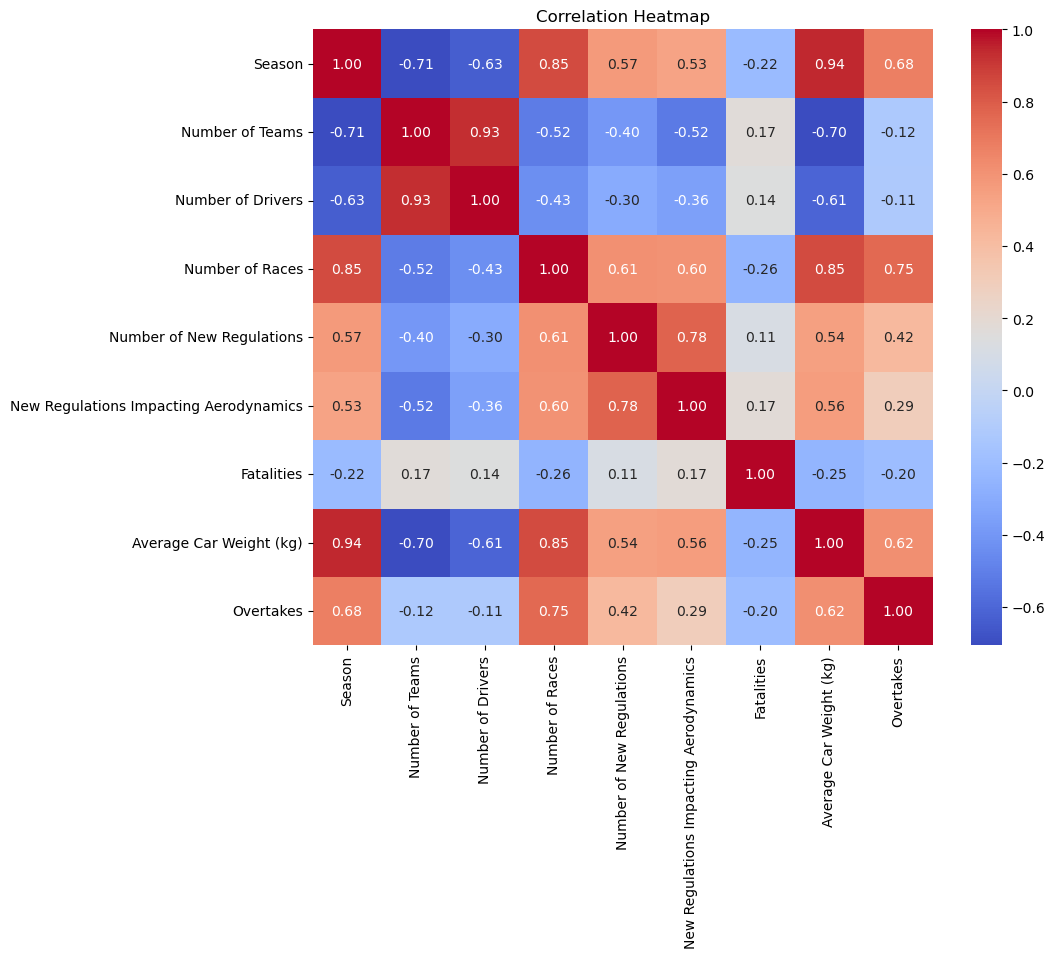

In [8]:
# Correlation Heatmap
numeric_df = formula_1.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# DRS usage across seasons

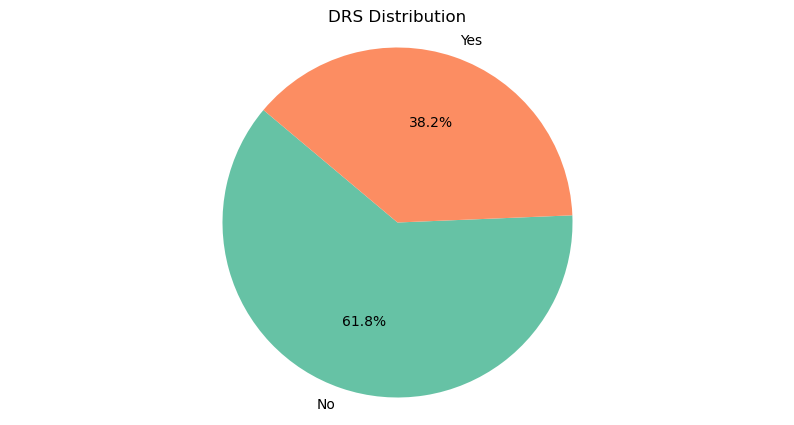

In [14]:
# get counts
type_counts = formula_1['DRS'].value_counts()

# define figure size
plt.figure(figsize=(10, 5))

# define Seaborn color palette to use 
palette_color = sns.color_palette('Set2')

# create pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=palette_color)
plt.title('DRS Distribution')
plt.axis('equal')
plt.show()

# Car Weight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


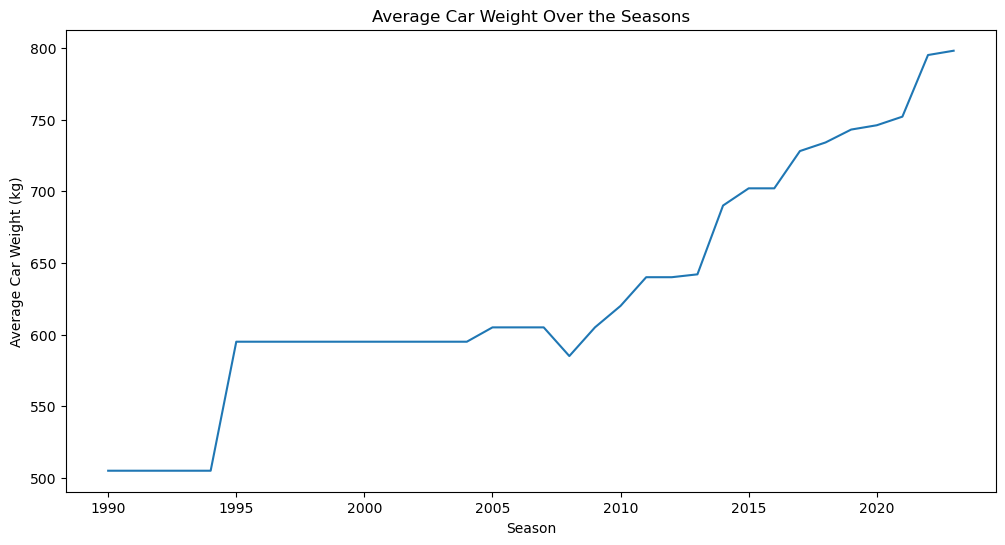

In [15]:
# create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=formula_1, x='Season', y='Average Car Weight (kg)')
plt.title('Average Car Weight Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Average Car Weight (kg)')
plt.show()

# Races insights

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


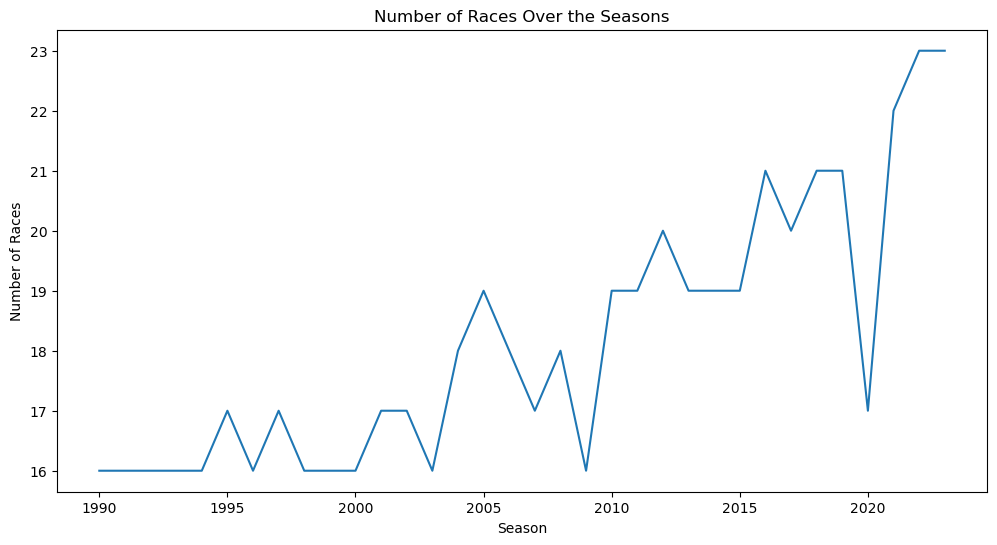

In [16]:
# create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=formula_1, x='Season', y='Number of Races')
plt.title('Number of Races Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.show()
plt.close()

# Overtakes insights

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


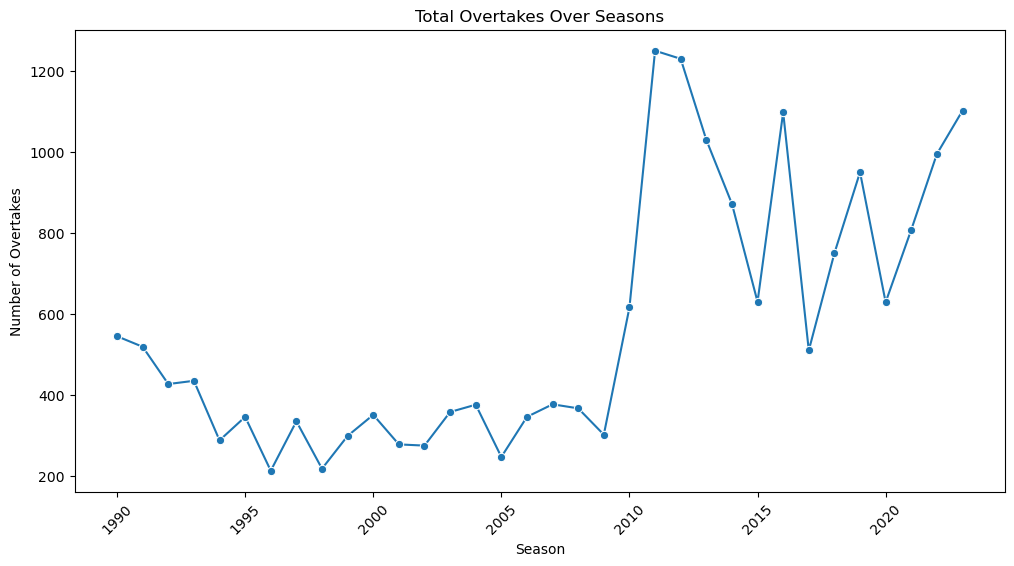

In [12]:
# overtakes per season
overtakes_per_season = formula_1[['Season','Overtakes']]

# create plot line
plt.figure(figsize=(12, 6))
sns.lineplot(data=overtakes_per_season, x='Season', y='Overtakes', marker='o')
plt.title('Total Overtakes Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Overtakes')
plt.xticks(rotation=45)
plt.show()
plt.close()

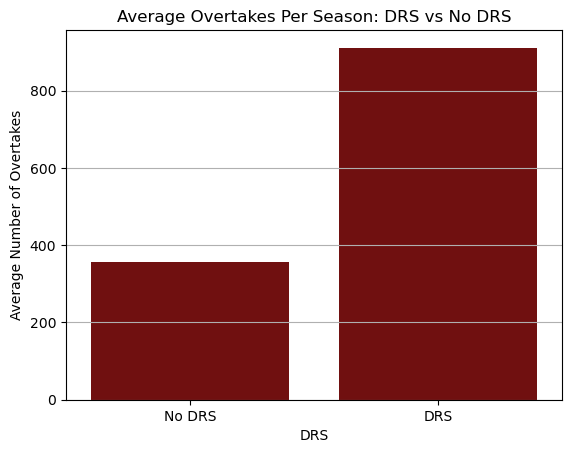

In [13]:
# arrange overtakes by DRS
overtakes_due_DRS = formula_1.groupby(['DRS']).agg({'Overtakes':'mean'}).reset_index()

# plotting data
ax = sns.barplot(data=overtakes_due_DRS, x='DRS', y='Overtakes', color='maroon')
plt.title('Average Overtakes Per Season: DRS vs No DRS')
plt.xlabel('DRS')
plt.ylabel('Average Number of Overtakes')
plt.xticks([0, 1], ['No DRS', 'DRS'])
plt.grid(axis='y')
plt.show()
plt.close()